In [1]:
# Import things
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import pickle
import glob
from PIL import Image

from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#  Definition
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# Model definition
model = model = CNN()
# Loss function definition
loss = nn.CrossEntropyLoss()
# Optimizer definition
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [3]:
# Training loop
def train(model, loss_fn, train_data, optimizer, epochs=100):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    result = {'train_loss': [], 'train_acc': []}

    for epoch in range(epochs):
        total_loss, correct_predictions, total_samples = 0, 0, 0
        model.train()

        for _, (inputs, labels) in enumerate(train_data):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs.view(-1, 1, 28, 28))  # Fix: Changed x to inputs and input to the correct variable
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += len(labels)

        train_loss = total_loss / total_samples
        train_accuracy = correct_predictions / total_samples

        print(f"Epoch {epoch + 1}/{epochs}, Train acc={train_accuracy:.3f}, Train loss={train_loss:.3f}")

        result['train_loss'].append(train_loss)
        result['train_acc'].append(train_accuracy)

    return result

In [4]:
# Get the current directory
import os
test_directory = "MNIST - JPG - testing"
training_directory = "MNIST - JPG - training"
print(os.getcwd())
full_test_directory = os.path.join(os.getcwd(), training_directory)
print(full_test_directory)

c:\Users\admin\OneDrive - Nanyang Technological University\Desktop\My file\Mini Project
c:\Users\admin\OneDrive - Nanyang Technological University\Desktop\My file\Mini Project\MNIST - JPG - training


In [5]:
# Preprocessing the raw data
class CustomMNISTDataset(Dataset):
    def __init__(self, root, train=True, transform=None):
        self.root = root
        self.train = train
        self.transform = transform
        self.data, self.labels = self.load_mnist()

    def load_mnist(self):
        data = []
        labels = []

        folder_name = "MNIST - JPG - training" if self.train else "MNIST - JPG - testing"

        for label in range(10):
            label_folder = os.path.join(self.root, folder_name, str(label))
            for image_file_name in os.listdir(label_folder):
                image_path = os.path.join(label_folder, image_file_name)
                data.append(Image.open(image_path).convert('L'))  
                labels.append(label)

        return data, labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx], self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

class MNISTTransform():
    def __init__(self, resize=(28, 28), mean=0.5, std=0.5):
        self.resize = resize
        self.mean = mean
        self.std = std

    def resize_image(self, img):
        return img.resize(self.resize, Image.ANTIALIAS)

    def to_tensor(self, img):
        img_array = np.array(img, dtype=np.float32) / 255.0
        img_tensor = torch.from_numpy(img_array).unsqueeze(0)  
        return img_tensor

    def normalize(self, img):
        return (img - self.mean) / self.std

    def __call__(self, img):
        img_resized = self.resize_image(img)
        img_tensor = self.to_tensor(img_resized)
        img_normalized = self.normalize(img_tensor)
        return img_normalized


In [7]:
root_path = #replace with your data directory
transform = MNISTTransform()
train_dataset = CustomMNISTDataset(root=root_path, train=True, transform=transform)
test_dataset = CustomMNISTDataset(root=root_path, train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [8]:
training_result = train(model, loss, train_loader, optimizer, epochs=20)
torch.save(model.state_dict(), 'my_model.pth')

C:\Users\admin\AppData\Local\Temp\ipykernel_19496\2979996608.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return img.resize(self.resize, Image.ANTIALIAS)


Epoch 1/20, Train acc=0.910, Train loss=0.009
Epoch 2/20, Train acc=0.945, Train loss=0.006
Epoch 3/20, Train acc=0.951, Train loss=0.005
Epoch 4/20, Train acc=0.953, Train loss=0.005
Epoch 5/20, Train acc=0.959, Train loss=0.004
Epoch 6/20, Train acc=0.960, Train loss=0.004
Epoch 7/20, Train acc=0.962, Train loss=0.004
Epoch 8/20, Train acc=0.964, Train loss=0.004
Epoch 9/20, Train acc=0.966, Train loss=0.004
Epoch 10/20, Train acc=0.966, Train loss=0.004
Epoch 11/20, Train acc=0.966, Train loss=0.004
Epoch 12/20, Train acc=0.968, Train loss=0.003
Epoch 13/20, Train acc=0.969, Train loss=0.003
Epoch 14/20, Train acc=0.970, Train loss=0.003
Epoch 15/20, Train acc=0.970, Train loss=0.003
Epoch 16/20, Train acc=0.970, Train loss=0.003
Epoch 17/20, Train acc=0.971, Train loss=0.003
Epoch 18/20, Train acc=0.972, Train loss=0.003
Epoch 19/20, Train acc=0.972, Train loss=0.003
Epoch 20/20, Train acc=0.972, Train loss=0.003


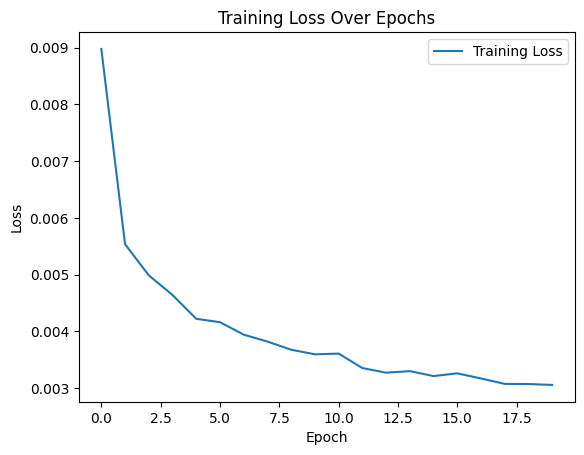

In [9]:
plt.plot(training_result['train_loss'], label='Training Loss', color='tab:blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_19496\2979996608.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  return img.resize(self.resize, Image.ANTIALIAS)


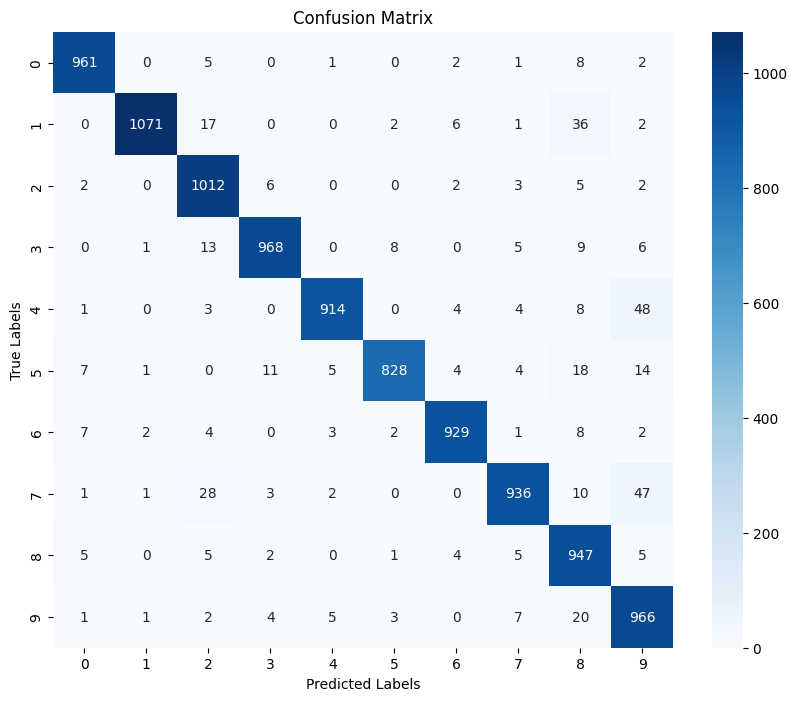

In [11]:
# Test the performance
loaded_model = CNN()
loaded_model.load_state_dict(torch.load('my_model.pth'))
loaded_model.eval()
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def get_predictions(model, data_loader):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for _, (inputs, labels) in enumerate(data_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs.view(-1, 1, 28, 28))

            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_preds, all_labels


test_preds, test_labels = get_predictions(loaded_model, test_loader)
conf_matrix = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
